# Multiple Regression Model Assignment

#### Start date - 22/01/2019 
    
## By Naveed Jeddy

### Problem Statement

##### A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

##### They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

##### Which variables are significant in predicting the price of a car
##### How well those variables describe the price of a car

### Step 1: Reading and Understanding the Data

### Let us first import NumPy and Pandas and read the CarPrice dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
carpricing = pd.read_csv("CarPrice_Assignment.csv")

In [4]:
# Check the head of the dataset
carpricing.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Inspect various aspects of the carpricing dataframe

In [5]:
carpricing.shape

(205, 26)

### It contains 205 rows with 26 columns

In [6]:
carpricing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

### there are no NULL values in the dataframe, so need not worry about any missing values or to replace null values

In [7]:
carpricing.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### There are 16 Numerical Variables and rest 10 are Categorical Variables

## Step 2 - Data Preparation

### CarName Column is containing 2 parts Car Company and Model Name , only Car Name needs to be considered for Model Analysis...Lets split the column CarName into Car and Model colums

In [8]:
## Spliting CarName column into Car and Model name columns as it contains Car Company and Model name together

carpricing['Car'] = carpricing.CarName.str.split(' ', expand = True)[0]
carpricing['Model'] =  carpricing.CarName.str.split(' ', expand = True)[1]

In [9]:
## Dropping the Original CarName column as it would not be required
carpricing.drop(['CarName'], axis=1,inplace=True)

In [10]:
## Dropping the newly created Model column as that also is not be required
carpricing.drop(['Model'], axis=1,inplace=True)

In [11]:
carpricing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg       

### Step 2: Visualising the Data

##### Let's now spend some time doing what is arguably the most important step - understanding the data.If there is some obvious multicollinearity going on, this is the first place to catch it

##### Here's where you'll also identify if some predictors directly have a strong association with the outcome variable.We'll visualise our data using matplotlib and seaborn.



In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Visualising Numeric Variables

$$$$ Let's make a pairplot of all the numeric variables

In [13]:

#sns.pairplot(carpricing)
#plt.show()

### The above pairplot was created for 16 Numeric variables...but was difficult to analyse the output...hence have commented out above....unable to figure out clearly....lets try heamap to see correlations

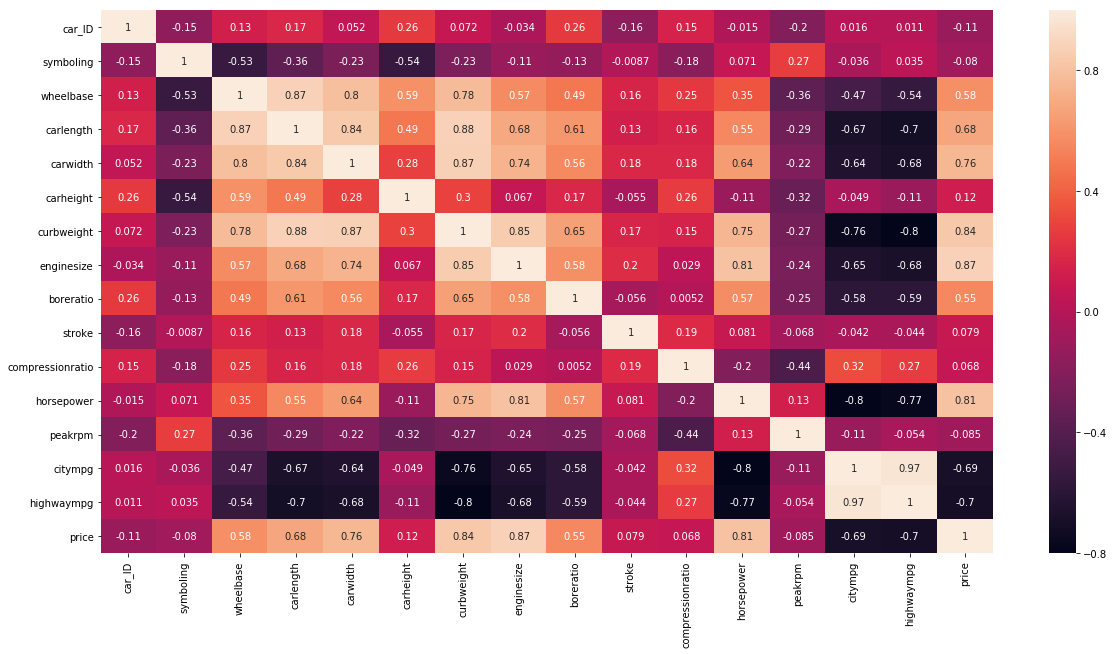

In [14]:
## Generate heatmap to figure the high correlated variables
plt.figure(figsize = (20,10))  
sns.heatmap(carpricing.corr(),annot = True)

### High Correlated Variables

### citympg and highwaympg - 0.97
### carlength and wheelbase - 0.87
### carlength and carwidth - 0.84
### curbweight and carlength - 0.88
### curbweight and carwidth - 0.87
### enginesize and horsepower - 0.81

### The above variables can be dropped as they are highly correlated but since we notice as highlighted below that horsepower and enginesize are correlated with outcome/predictor variable "price" we will not drop this 2 variables and rest can be dropped


### price and enginesize - 0.87
### price and horsepower - 0.87


### Also, car ID is just a serial number not actual data and hence that can be dropped...




In [15]:
## As mentioned above dropping the below variables

carpricing.drop(['car_ID','carwidth','curbweight','wheelbase','citympg','highwaympg','carlength','wheelbase'], axis =1, inplace = True)

In [16]:
## Let's check the dataframe after dropping the above variables

carpricing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 19 columns):
symboling           205 non-null int64
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
carheight           205 non-null float64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
price               205 non-null float64
Car                 205 non-null object
dtypes: float64(5), int64(4), object(10)
memory usage: 30.5+ KB


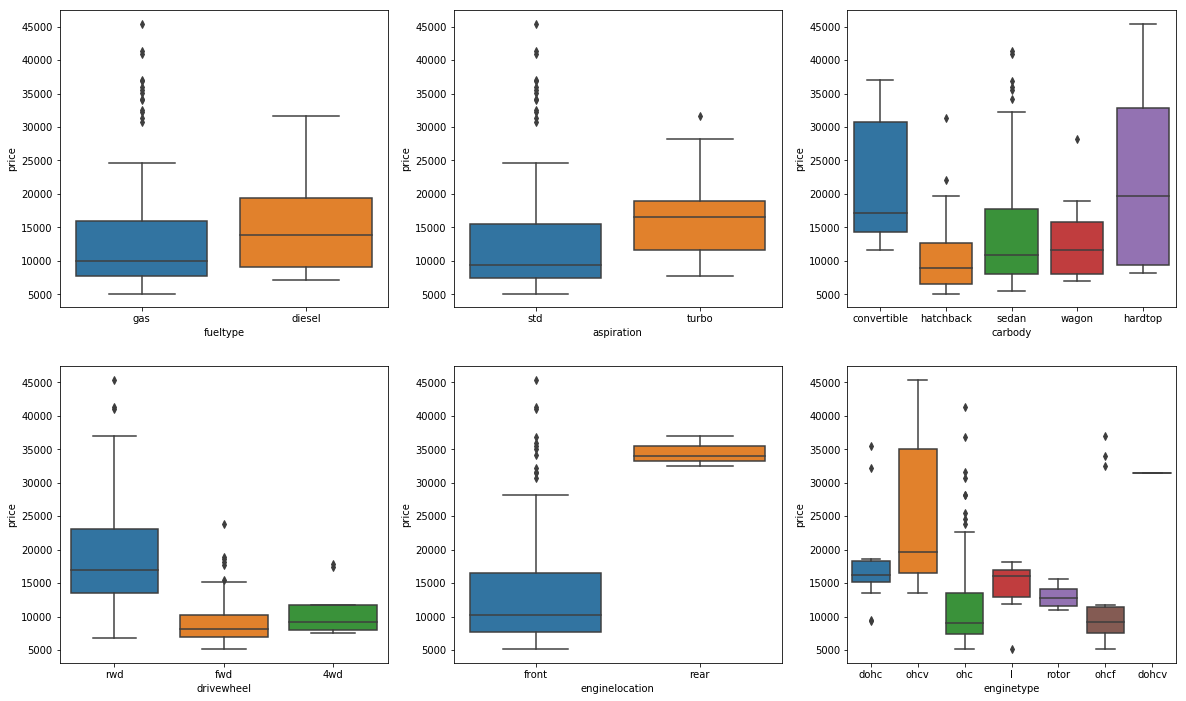

In [17]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = carpricing)
plt.subplot(2,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = carpricing)
plt.subplot(2,3,3)
sns.boxplot(x = 'carbody', y = 'price', data = carpricing)
plt.subplot(2,3,4)
sns.boxplot(x = 'drivewheel', y = 'price', data = carpricing)
plt.subplot(2,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = carpricing)
plt.subplot(2,3,6)
sns.boxplot(x = 'enginetype', y = 'price', data = carpricing)
plt.show()

## Inference from box plots

### Diesel Cars price is higher than gas...but notice that there are some outliers in gas atleast 15-20
### Turbo Cars price is higher than std...similarly there are some outliers in std which appears same as gas so it could be that std gas cars have some outliers where they are priced higher than the diesel cars
### hardtop and convertible cars prices seems to be similar and are higher than the other car types wagon and hatchback on a same range...and sedan cars are higher than this 2...and also note that there are some outliers in sedan cars which are highly priced than the hardtop/convertible cars
### rwd drivewheel type cars are higher
### rear engine location cars are higher with some outliers in front engine location cars
### dhcv enginetype cars are higher 

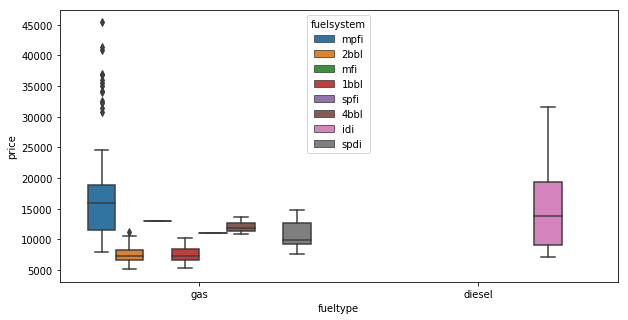

In [18]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'fueltype', y = 'price', hue = 'fuelsystem', data = carpricing)
plt.show()

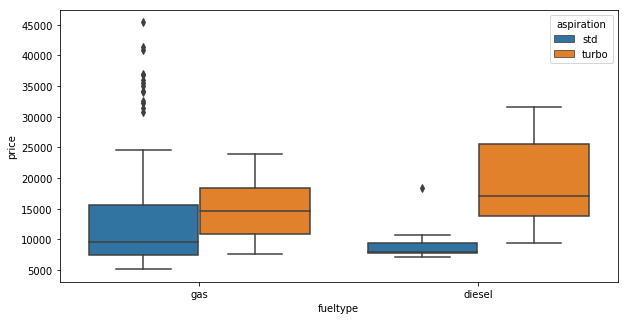

In [19]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'fueltype', y = 'price', hue = 'aspiration', data = carpricing)
plt.show()

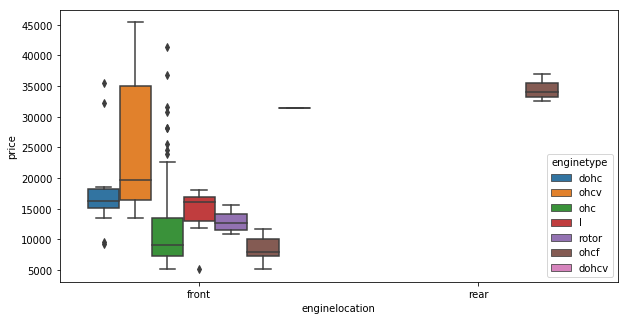

In [20]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'enginelocation', y = 'price', hue = 'enginetype', data = carpricing)
plt.show()

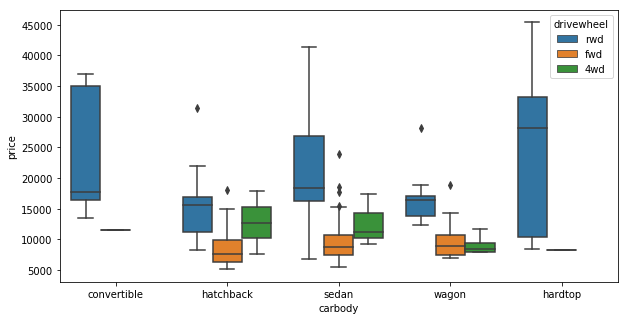

In [21]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'carbody', y = 'price', hue = 'drivewheel', data = carpricing)
plt.show()

## Step 3 : Data Preparation

#### You can see that your dataset has many columns with Categorical values
#### But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s, 

In [22]:
## Let's check the Car column that we created before has Unique Car names
carpricing.Car.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

### Inference from above check

#### It is clear that there is bad data like typo ,  mazda is spelled as maxda,  notice Nissan and nissan as separate
#### Toyota is spelled incorrectly as toyouta
#### volkswagen is spelled incorrectly as vokswagen and also in short form as 'vw'
#### porsche is spelled as porcshce


In [23]:
### To keep car names consistent in terms of same case letters, let's convert all Car names in lower case

carpricing.Car = carpricing['Car'].str.lower()

In [24]:
### To correct all data errors of Car names as highlighte above

carpricing['Car'] = carpricing['Car'].str.replace('maxda','mazda')
carpricing['Car'] = carpricing['Car'].str.replace('toyouta','toyota')
carpricing['Car'] = carpricing['Car'].str.replace('vokswagen','volkswagen')
carpricing['Car'] = carpricing['Car'].str.replace('vw','volkswagen')
carpricing['Car'] = carpricing['Car'].str.replace('porcshce','porsche')

In [25]:
### Let's re-check the uniqueness of the Car name after the above changes
carpricing.Car.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

### It looks from above now we have unique 'Cars' in the dataframe 

In [26]:
## To check how many Cars  or Car Companies that we have
len(carpricing['Car'].unique().tolist())

22

### There are 22 Car companies that we need to analyze for the problem statement

## Step 3.1. Dummy Variables

### For Categorical Variables, where we have 2 or more distinct levels we need to Create Dummy Variables i.e.k-1 where k is the number of levels

### Based on the data observed , we notice columns fueltype, aspiration, doornumber, engine location columns have only 2 distinct levels, so we cannot create Dummy Variables ..they have to be converted into integer '1'or '0'

In [27]:
# Accordingly the respectice columns are mapped with either '1'or '0' based on the value

carpricing['fueltype'] = carpricing['fueltype'].map({'gas': 1, 'diesel': 0})
carpricing['aspiration'] = carpricing['aspiration'].map({'std': 1, 'turbo': 0})
carpricing['doornumber'] = carpricing['doornumber'].map({'two': 1, 'four': 0})
carpricing['enginelocation'] = carpricing['enginelocation'].map({'front': 1, 'rear': 0})

In [28]:
# Let's check the dataframe now
carpricing.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carheight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,Car
0,3,1,1,1,convertible,rwd,1,48.8,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,alfa-romero
1,3,1,1,1,convertible,rwd,1,48.8,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,alfa-romero
2,1,1,1,1,hatchback,rwd,1,52.4,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,alfa-romero
3,2,1,1,0,sedan,fwd,1,54.3,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,audi
4,2,1,1,0,sedan,4wd,1,54.3,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,audi


### The other Categorical variables have more than 2 distinct levels, we need to create Dummy Variables for them

In [29]:
## Creating Dummy Variables for carpricing
carmodelling = pd.get_dummies(carpricing)


In [30]:
## Let's check the dataframe created with dummies variables
carmodelling.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,carheight,enginesize,boreratio,stroke,compressionratio,...,Car_nissan,Car_peugeot,Car_plymouth,Car_porsche,Car_renault,Car_saab,Car_subaru,Car_toyota,Car_volkswagen,Car_volvo
0,3,1,1,1,1,48.8,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,0,0,0
1,3,1,1,1,1,48.8,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,52.4,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,0,0,0
3,2,1,1,0,1,54.3,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,0,0,0
4,2,1,1,0,1,54.3,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
## Let's check more details of carmodelling dataframe
carmodelling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 65 columns):
symboling                205 non-null int64
fueltype                 205 non-null int64
aspiration               205 non-null int64
doornumber               205 non-null int64
enginelocation           205 non-null int64
carheight                205 non-null float64
enginesize               205 non-null int64
boreratio                205 non-null float64
stroke                   205 non-null float64
compressionratio         205 non-null float64
horsepower               205 non-null int64
peakrpm                  205 non-null int64
price                    205 non-null float64
carbody_convertible      205 non-null uint8
carbody_hardtop          205 non-null uint8
carbody_hatchback        205 non-null uint8
carbody_sedan            205 non-null uint8
carbody_wagon            205 non-null uint8
drivewheel_4wd           205 non-null uint8
drivewheel_fwd           205 non-null uint8
drive

### As we see above in data and info, all variables are now numeric and can now be used for Multiple Linear Regression Model building

## Step 4: Splitting the Data into Training and Testing Sets


#### As you know, the first basic step for regression is performing a train-test split.

In [32]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
car_train, car_test = train_test_split(carmodelling, train_size = 0.7, test_size = 0.3, random_state = 100)

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
scaler = MinMaxScaler()

In [35]:
car_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 122 to 8
Data columns (total 65 columns):
symboling                143 non-null int64
fueltype                 143 non-null int64
aspiration               143 non-null int64
doornumber               143 non-null int64
enginelocation           143 non-null int64
carheight                143 non-null float64
enginesize               143 non-null int64
boreratio                143 non-null float64
stroke                   143 non-null float64
compressionratio         143 non-null float64
horsepower               143 non-null int64
peakrpm                  143 non-null int64
price                    143 non-null float64
carbody_convertible      143 non-null uint8
carbody_hardtop          143 non-null uint8
carbody_hatchback        143 non-null uint8
carbody_sedan            143 non-null uint8
carbody_wagon            143 non-null uint8
drivewheel_4wd           143 non-null uint8
drivewheel_fwd           143 non-null uint8
drive

In [36]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['price','carheight', 'enginesize', 'boreratio', 'stroke', 'compressionratio','horsepower','peakrpm']

car_train[num_vars] = scaler.fit_transform(car_train[num_vars])

In [37]:
car_train.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,carheight,enginesize,boreratio,stroke,compressionratio,...,Car_nissan,Car_peugeot,Car_plymouth,Car_porsche,Car_renault,Car_saab,Car_subaru,Car_toyota,Car_volkswagen,Car_volvo
122,1,1,1,0,1,0.265487,0.139623,0.230159,0.525253,0.15000,...,0,0,1,0,0,0,0,0,0,0
125,3,1,1,1,1,0.212389,0.339623,1.000000,0.464646,0.15625,...,0,0,0,1,0,0,0,0,0,0
166,1,1,1,1,1,0.424779,0.139623,0.444444,0.449495,0.15000,...,0,0,0,0,0,0,0,1,0,0
1,3,1,1,1,1,0.088496,0.260377,0.626984,0.247475,0.12500,...,0,0,0,0,0,0,0,0,0,0
199,-1,1,0,0,1,0.858407,0.260377,0.746032,0.484848,0.03125,...,0,0,0,0,0,0,0,0,0,1


In [38]:
car_train.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,carheight,enginesize,boreratio,stroke,compressionratio,...,Car_nissan,Car_peugeot,Car_plymouth,Car_porsche,Car_renault,Car_saab,Car_subaru,Car_toyota,Car_volkswagen,Car_volvo
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.797203,0.909091,0.818182,0.440559,0.993007,0.509004,0.241351,0.497946,0.535389,0.190787,...,0.097902,0.055944,0.027972,0.020979,0.013986,0.020979,0.076923,0.139860,0.048951,0.041958
std,1.195999,0.288490,0.387050,0.498199,0.083624,0.215378,0.154619,0.207140,0.157843,0.237181,...,0.298227,0.230621,0.165472,0.143818,0.117845,0.143818,0.267406,0.348061,0.216524,0.201198
min,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.353982,0.135849,0.305556,0.464646,0.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,1.000000,0.522124,0.184906,0.500000,0.545455,0.125000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.668142,0.301887,0.682540,0.611111,0.150000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
car_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 122 to 8
Data columns (total 65 columns):
symboling                143 non-null int64
fueltype                 143 non-null int64
aspiration               143 non-null int64
doornumber               143 non-null int64
enginelocation           143 non-null int64
carheight                143 non-null float64
enginesize               143 non-null float64
boreratio                143 non-null float64
stroke                   143 non-null float64
compressionratio         143 non-null float64
horsepower               143 non-null float64
peakrpm                  143 non-null float64
price                    143 non-null float64
carbody_convertible      143 non-null uint8
carbody_hardtop          143 non-null uint8
carbody_hatchback        143 non-null uint8
carbody_sedan            143 non-null uint8
carbody_wagon            143 non-null uint8
drivewheel_4wd           143 non-null uint8
drivewheel_fwd           143 non-null uint8

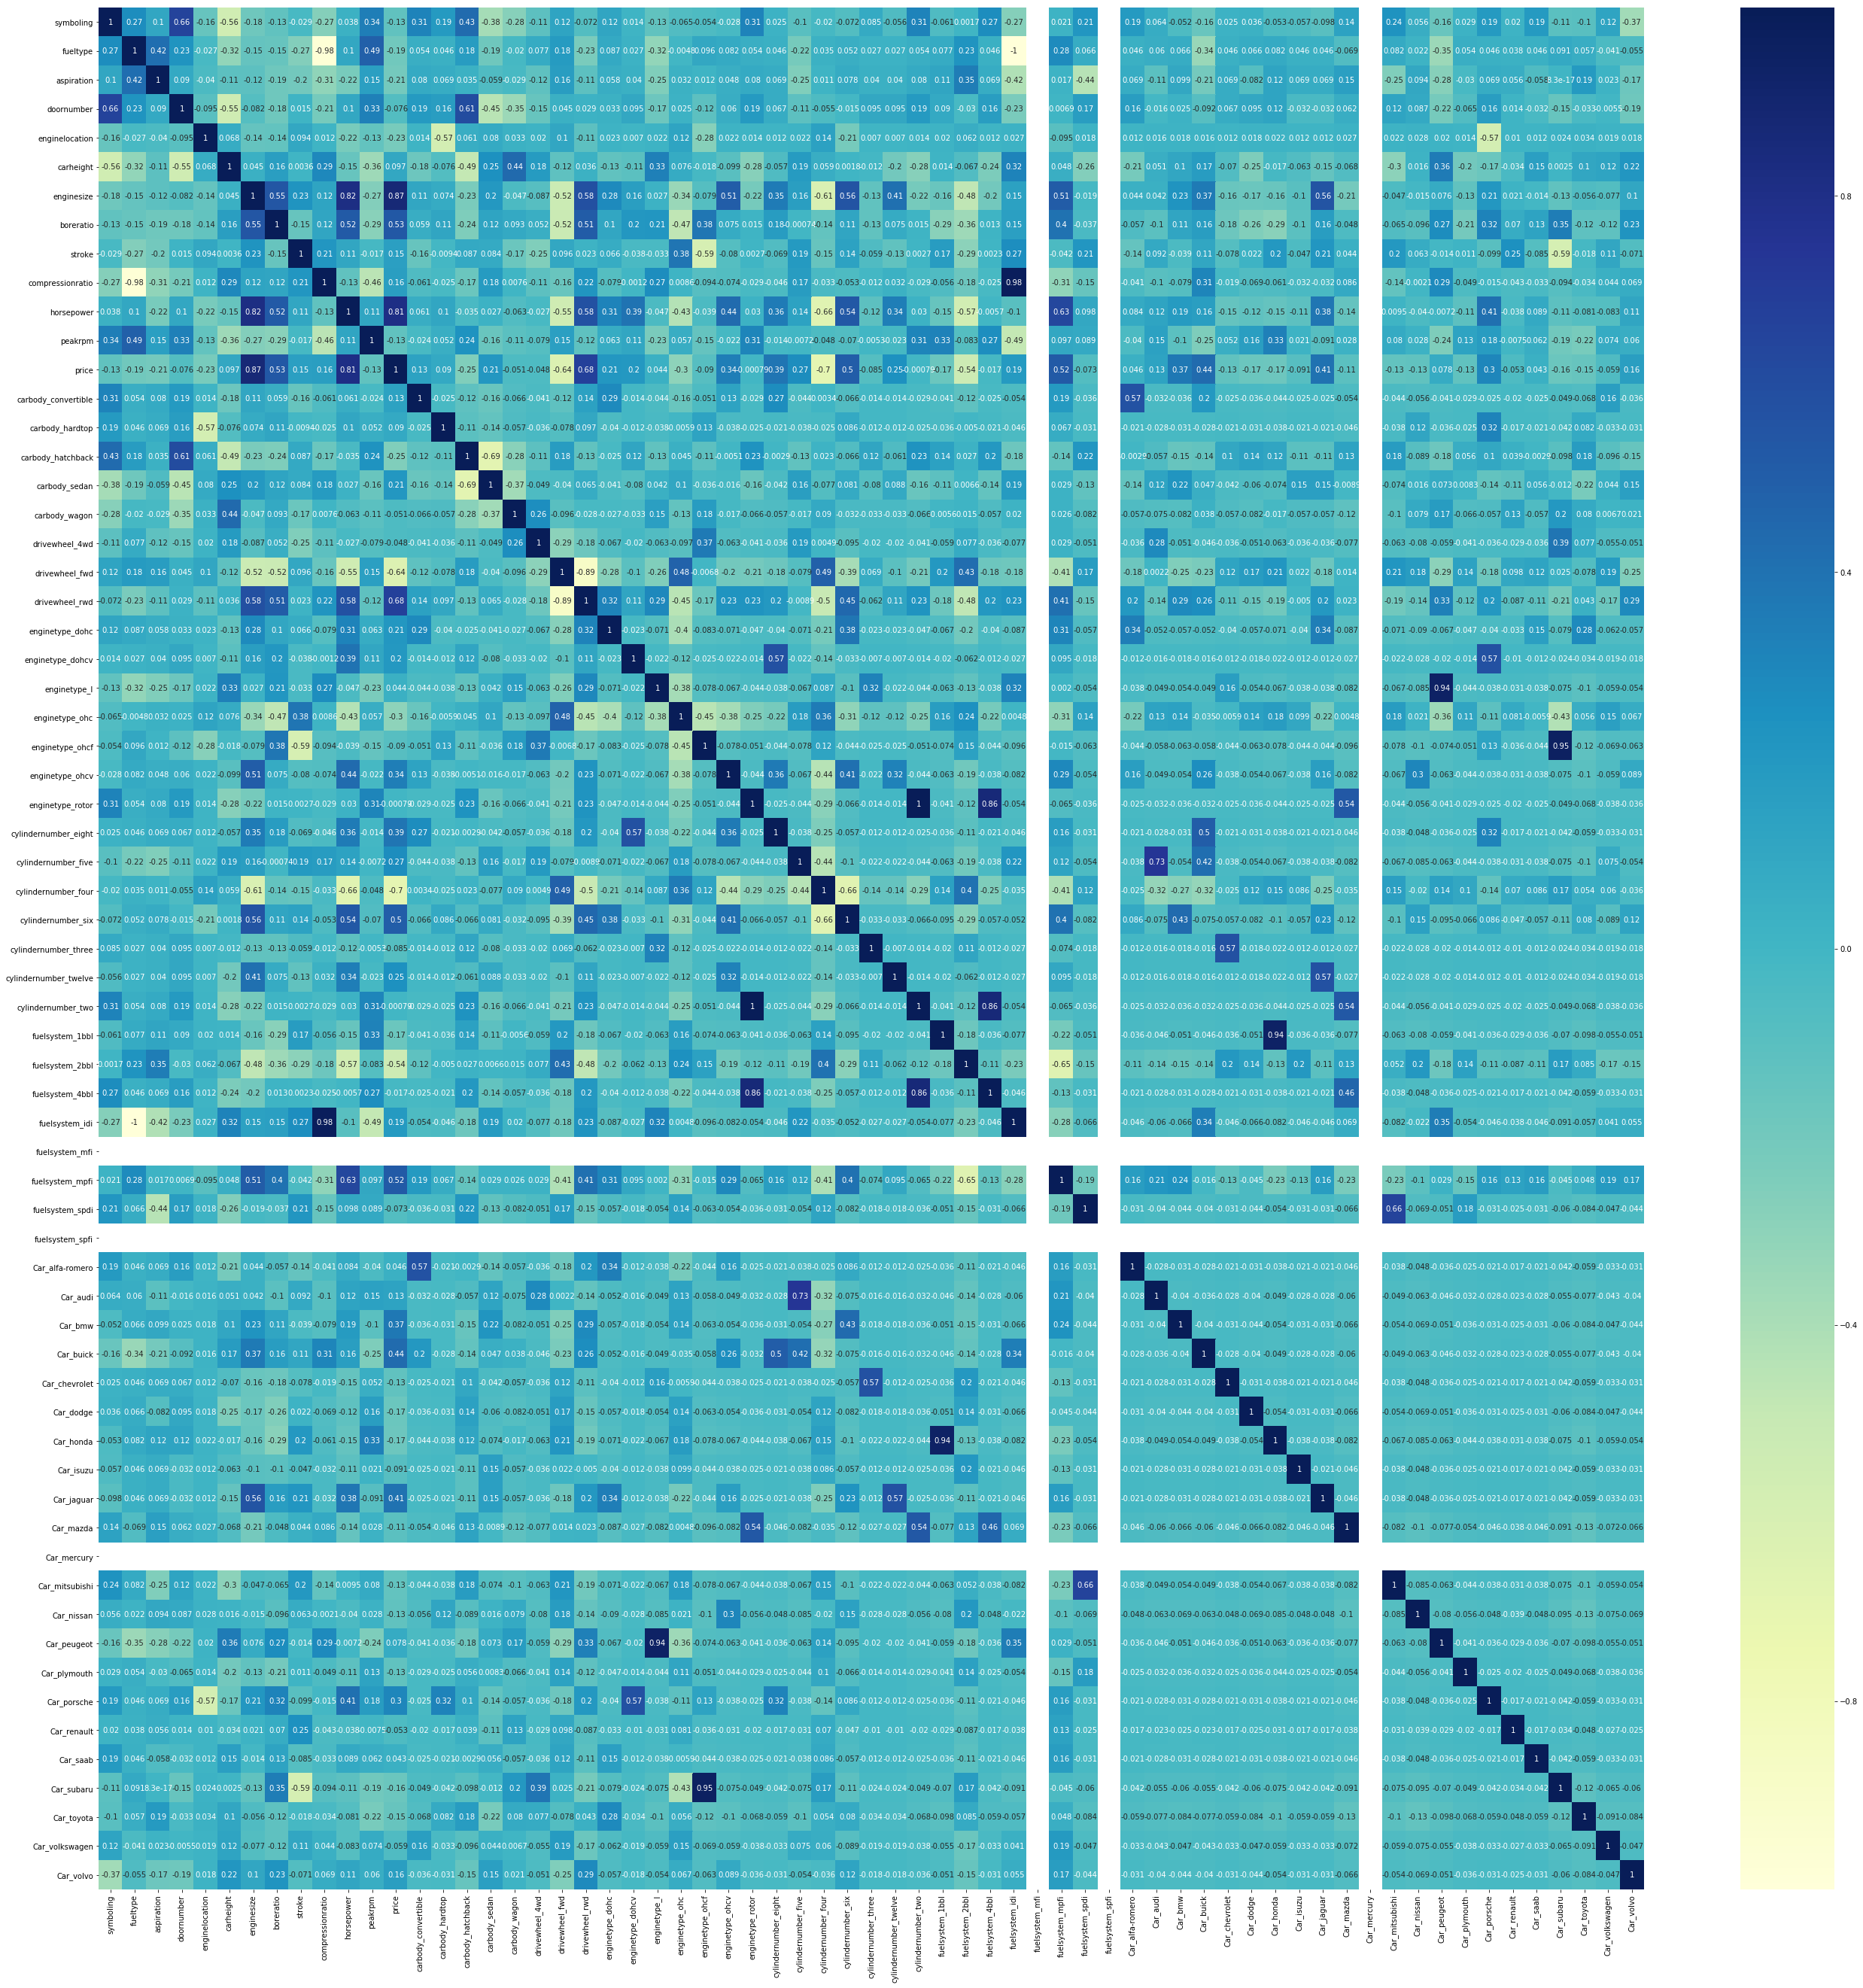

In [40]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (46, 46))
sns.heatmap(car_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Observing the high correlations in the heatmaps by zooming in the image figured out that maximum correlation that has with 'price' is 'enginesize' which is 0.87

### Dividing into X and Y sets for the model building

In [41]:
y_car = car_train['price']
X_car = car_train

## Step 5: Building a linear model

#### Fit a regression line through the training data using statsmodels. Remember that in statsmodels, you need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.

In [42]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_car[['enginesize']])

# Create a first fitted model
lr = sm.OLS(y_car, X_train_lm).fit()

In [43]:
# Check the parameters obtained

lr.params

const        -0.072888
enginesize    1.210676
dtype: float64

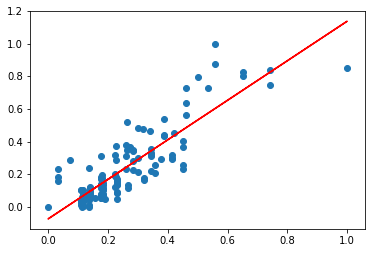

In [44]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_car)
plt.plot(X_train_lm.iloc[:, 1], -0.073 + 1.211*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [45]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     430.5
Date:                Sat, 26 Jan 2019   Prob (F-statistic):           1.09e-44
Time:                        23:30:25   Log-Likelihood:                 117.01
No. Observations:                 143   AIC:                            -230.0
Df Residuals:                     141   BIC:                            -224.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0729      0.017     -4.362      0.0

### The second highly correlated variable is 'horsepower'which is 0.81..lets add it...

In [46]:
# Assign all the feature variables to X
X_train_lm = X_car[['enginesize', 'horsepower']]

In [47]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_car, X_train_lm).fit()

lr.params

const        -0.078951
enginesize    0.878745
horsepower    0.379117
dtype: float64

In [48]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     250.1
Date:                Sat, 26 Jan 2019   Prob (F-statistic):           6.17e-47
Time:                        23:30:25   Log-Likelihood:                 125.63
No. Observations:                 143   AIC:                            -245.3
Df Residuals:                     140   BIC:                            -236.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0790      0.016     -4.981      0.0

### It's clear from the above report that model has improved from the earlier one the Adj. R-squared has increased from '0.752'to '0.778'......

### let's add another variable...which is 3rd highest 'drivewheel_rwd'

In [49]:
# Assign all the feature variables to X
X_train_lm = X_car[['enginesize', 'horsepower','drivewheel_rwd']]

In [50]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_car, X_train_lm).fit()

lr.params

const            -0.068826
enginesize        0.773953
horsepower        0.289140
drivewheel_rwd    0.101872
dtype: float64

In [51]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     202.1
Date:                Sat, 26 Jan 2019   Prob (F-statistic):           1.76e-50
Time:                        23:30:26   Log-Likelihood:                 137.01
No. Observations:                 143   AIC:                            -266.0
Df Residuals:                     139   BIC:                            -254.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0688      0.015     -4.

### We have improved again...let's add all the variables

In [52]:
carmodelling.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'carheight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'price', 'carbody_convertible',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'cylindernumber_eight', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_1bbl', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi',
       'Car_alfa-romero', 'Car_audi', 'Car_bmw', 'Car_buick', 'Car_chevrolet',
       'Car_dodge', 'Car_honda', 'Car_isuzu', 'Car_jaguar', 'Car_ma

In [53]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_car)

lr_1 = sm.OLS(y_car, X_train_lm).fit()

lr_1.params

const                  -5.551115e-17
symboling               1.179612e-16
fueltype                1.665335e-16
aspiration             -2.775558e-17
doornumber             -1.249001e-16
enginelocation         -3.295975e-16
carheight               1.665335e-16
enginesize             -1.998401e-15
boreratio               1.665335e-16
stroke                 -3.053113e-16
compressionratio       -4.440892e-16
horsepower              0.000000e+00
peakrpm                -7.216450e-16
price                   1.000000e+00
carbody_convertible    -2.775558e-16
carbody_hardtop         2.498002e-16
carbody_hatchback       5.308254e-16
carbody_sedan           5.967449e-16
carbody_wagon           1.110223e-16
drivewheel_4wd          2.498002e-16
drivewheel_fwd         -5.551115e-17
drivewheel_rwd         -3.608225e-16
enginetype_dohc         4.996004e-16
enginetype_dohcv        2.775558e-16
enginetype_l            1.387779e-16
enginetype_ohc          1.387779e-16
enginetype_ohcf         1.110223e-16
e

In [54]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.679e+29
Date:                Sat, 26 Jan 2019   Prob (F-statistic):               0.00
Time:                        23:30:26   Log-Likelihood:                 4789.2
No. Observations:                 143   AIC:                            -9472.
Df Residuals:                      90   BIC:                            -9315.
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -5.551e-

### As you see when we include all variables we could see many high p-value insignificant variables....which need to be dropped...let's check with VIF

In [55]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [56]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_car.columns
vif['VIF'] = [variance_inflation_factor(X_car.values, i) for i in range(X_car.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
31,cylindernumber_six,inf
48,Car_dodge,inf
33,cylindernumber_twelve,inf
34,cylindernumber_two,inf
35,fuelsystem_1bbl,inf
36,fuelsystem_2bbl,inf
37,fuelsystem_4bbl,inf
38,fuelsystem_idi,inf
40,fuelsystem_mpfi,inf
41,fuelsystem_spdi,inf


### Now with this method one way could be we keep dropping the high p-value and the VIF high or infinite variables and keep updating the model...but with as many as 64 variables it would be a tough task....let's try RFE method..

### Using RFE to decide what variables can be dropped...based on the p-values from the above summary report , have decided to remove 17 variables based on the p-value which is more than 0.5 or around 0.5

In [57]:
forRFE  = carmodelling.columns
forRFE

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'carheight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'price', 'carbody_convertible',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'cylindernumber_eight', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_1bbl', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi',
       'Car_alfa-romero', 'Car_audi', 'Car_bmw', 'Car_buick', 'Car_chevrolet',
       'Car_dodge', 'Car_honda', 'Car_isuzu', 'Car_jaguar', 'Car_ma

In [58]:
carmodelling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 65 columns):
symboling                205 non-null int64
fueltype                 205 non-null int64
aspiration               205 non-null int64
doornumber               205 non-null int64
enginelocation           205 non-null int64
carheight                205 non-null float64
enginesize               205 non-null int64
boreratio                205 non-null float64
stroke                   205 non-null float64
compressionratio         205 non-null float64
horsepower               205 non-null int64
peakrpm                  205 non-null int64
price                    205 non-null float64
carbody_convertible      205 non-null uint8
carbody_hardtop          205 non-null uint8
carbody_hatchback        205 non-null uint8
carbody_sedan            205 non-null uint8
carbody_wagon            205 non-null uint8
drivewheel_4wd           205 non-null uint8
drivewheel_fwd           205 non-null uint8
drive

In [59]:
carmodelling.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,carheight,enginesize,boreratio,stroke,compressionratio,...,Car_nissan,Car_peugeot,Car_plymouth,Car_porsche,Car_renault,Car_saab,Car_subaru,Car_toyota,Car_volkswagen,Car_volvo
0,3,1,1,1,1,48.8,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,0,0,0
1,3,1,1,1,1,48.8,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,52.4,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,0,0,0
3,2,1,1,0,1,54.3,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,0,0,0
4,2,1,1,0,1,54.3,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,0,0,0


## Apply Scaling using Normalization function.... All Numeric Variables identified as in num_vars in earlier approach has been identified for scaling with the inclusion of 'symboling' variable

#Identifying columns that needs to be Normalized 
cols_to_norm = ['price','carheight', 'enginesize', 'boreratio', 'stroke', 'compressionratio','horsepower','peakrpm','symboling']

# Normalising only the numeric fields 
normalised_car = carmodelling[cols_to_norm].apply(lambda x: (x-np.mean(x))/ (max(x) - min(x)))
normalised_car.head()

carmodelling['price'] = normalised_car['price']
carmodelling['carheight'] = normalised_car['carheight']
carmodelling['enginesize'] = normalised_car['enginesize']
carmodelling['boreratio'] = normalised_car['boreratio']
carmodelling['stroke'] = normalised_car['stroke']
carmodelling['compressionratio'] = normalised_car['compressionratio']
carmodelling['horsepower'] = normalised_car['horsepower']
carmodelling['peakrpm']= normalised_car['peakrpm']
carmodelling['symboling'] = normalised_car['symboling']
carmodelling.head()

In [60]:
from sklearn.preprocessing import MinMaxScaler

In [61]:
scaler = MinMaxScaler()

In [62]:
# Apply scaling

num_vars_RFE = ['price','carheight', 'enginesize', 'boreratio', 'stroke', 'compressionratio','horsepower','peakrpm','symboling']

carmodelling[num_vars_RFE] = scaler.fit_transform(carmodelling[num_vars_RFE])

In [63]:
carmodelling.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,carheight,enginesize,boreratio,stroke,compressionratio,...,Car_nissan,Car_peugeot,Car_plymouth,Car_porsche,Car_renault,Car_saab,Car_subaru,Car_toyota,Car_volkswagen,Car_volvo
0,1.0,1,1,1,1,0.083333,0.260377,0.664286,0.290476,0.1250,...,0,0,0,0,0,0,0,0,0,0
1,1.0,1,1,1,1,0.083333,0.260377,0.664286,0.290476,0.1250,...,0,0,0,0,0,0,0,0,0,0
2,0.6,1,1,1,1,0.383333,0.343396,0.100000,0.666667,0.1250,...,0,0,0,0,0,0,0,0,0,0
3,0.8,1,1,0,1,0.541667,0.181132,0.464286,0.633333,0.1875,...,0,0,0,0,0,0,0,0,0,0
4,0.8,1,1,0,1,0.541667,0.283019,0.464286,0.633333,0.0625,...,0,0,0,0,0,0,0,0,0,0


In [64]:
## Let's put all the feature variables which contains the Normalized Numeric values as well in X and the predictor variable in Y

X = carmodelling[['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'carheight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'carbody_convertible',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'cylindernumber_eight', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_1bbl', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi',
       'Car_alfa-romero', 'Car_audi', 'Car_bmw', 'Car_buick', 'Car_chevrolet',
       'Car_dodge', 'Car_honda', 'Car_isuzu', 'Car_jaguar', 'Car_mazda',
       'Car_mercury', 'Car_mitsubishi', 'Car_nissan', 'Car_peugeot',
       'Car_plymouth', 'Car_porsche', 'Car_renault', 'Car_saab', 'Car_subaru',
       'Car_toyota', 'Car_volkswagen', 'Car_volvo']]


Y = carmodelling['price']

In [65]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

np.random.seed(0)
X_train_RFE, X_test_RFE, Y_train_RFE, Y_test_RFE = train_test_split(X, Y, train_size=0.7 ,test_size = 0.3, random_state=100)

In [66]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


# Running RFE with the output number of the variable equal to 17
lm = LinearRegression()
rfe = RFE(lm, 17)             
rfe = rfe.fit(X_train_RFE, Y_train_RFE)

print(rfe.support_)           
print(rfe.ranking_)  

[False False False False False False  True  True  True False False False
 False False False False False False False False False False  True False
 False  True  True False  True  True False  True  True  True False False
 False False False False False False False  True  True  True False False
 False False False False False False False False False  True False  True
 False False False  True]
[44 14  3 46 24 30  1  1  1 19 47  7 22 28 31 39 33 40 41 36 10  5  1 11
 35  1  1  6  1  1 38  1  1  1 12 17 18 15 43 16 13 45 23  1  1  1 20  9
 27 29 21 37 48  4 26  2  8  1 32  1 25 42 34  1]


In [67]:
## Now let's check what are the columns that RFE_support suggests

X_train_RFE.columns[rfe.support_]

Index(['enginesize', 'boreratio', 'stroke', 'enginetype_l', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'Car_audi', 'Car_bmw', 'Car_buick', 'Car_porsche', 'Car_saab',
       'Car_volvo'],
      dtype='object')

In [68]:
#Now let's check what are the columns that RFE_support not suggests or supports
X_train_RFE.columns
dropvar = X_train_RFE.columns[~rfe.support_]
dropvar

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'carheight', 'compressionratio', 'horsepower', 'peakrpm',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohc', 'enginetype_dohcv',
       'enginetype_ohc', 'enginetype_ohcf', 'cylindernumber_eight',
       'cylindernumber_six', 'fuelsystem_1bbl', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi',
       'Car_alfa-romero', 'Car_chevrolet', 'Car_dodge', 'Car_honda',
       'Car_isuzu', 'Car_jaguar', 'Car_mazda', 'Car_mercury', 'Car_mitsubishi',
       'Car_nissan', 'Car_peugeot', 'Car_plymouth', 'Car_renault',
       'Car_subaru', 'Car_toyota', 'Car_volkswagen'],
      dtype='object')

### The above list of columns are been suggested by RFE to be removed..when I compare with the last summary report this columns appear to be those where the confidence ranges from a negative value and also have high p-values...so let's go ahead and drop this columns in 'dropvar'

In [69]:
## Original list of columns in the Train dataframe
X_train_RFE.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'carheight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'carbody_convertible', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_eight',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'Car_alfa-romero', 'Car_audi',
       'Car_bmw', 'Car_buick', 'Car_chevrolet', 'Car_dodge', 'Car_honda',
       'Car_isuzu', 'Car_jaguar', 'Car_mazda', 'Ca

In [70]:
## Creating a new Train dataframe by removing columns of 'dropvar'

X_train_RFE_upd = X_train_RFE.drop(dropvar,1)

X_train_RFE_upd.columns

Index(['enginesize', 'boreratio', 'stroke', 'enginetype_l', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'Car_audi', 'Car_bmw', 'Car_buick', 'Car_porsche', 'Car_saab',
       'Car_volvo'],
      dtype='object')

In [71]:
X_train_RFE_upd.head()

,enginesize,boreratio,stroke,enginetype_l,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,Car_audi,Car_bmw,Car_buick,Car_porsche,Car_saab,Car_volvo
122,0.139623,0.307143,0.552381,0,0,0,0,1,0,0,0,0,0,0,0,0,0
125,0.339623,1.000000,0.495238,0,0,0,0,1,0,0,0,0,0,0,1,0,0
166,0.139623,0.500000,0.480952,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0.260377,0.664286,0.290476,0,0,0,0,1,0,0,0,0,0,0,0,0,0
199,0.260377,0.771429,0.514286,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [72]:
# Let's drop the same variables now itself from test dataset so that we can keep in sync now itself

X_test_RFE_upd = X_train_RFE.drop(dropvar,1)

X_test_RFE_upd.columns

Index(['enginesize', 'boreratio', 'stroke', 'enginetype_l', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'Car_audi', 'Car_bmw', 'Car_buick', 'Car_porsche', 'Car_saab',
       'Car_volvo'],
      dtype='object')

In [73]:
## Original Train Dataset
X_train_RFE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 122 to 8
Data columns (total 64 columns):
symboling                143 non-null float64
fueltype                 143 non-null int64
aspiration               143 non-null int64
doornumber               143 non-null int64
enginelocation           143 non-null int64
carheight                143 non-null float64
enginesize               143 non-null float64
boreratio                143 non-null float64
stroke                   143 non-null float64
compressionratio         143 non-null float64
horsepower               143 non-null float64
peakrpm                  143 non-null float64
carbody_convertible      143 non-null uint8
carbody_hardtop          143 non-null uint8
carbody_hatchback        143 non-null uint8
carbody_sedan            143 non-null uint8
carbody_wagon            143 non-null uint8
drivewheel_4wd           143 non-null uint8
drivewheel_fwd           143 non-null uint8
drivewheel_rwd           143 non-null uint8

In [74]:
## Updated Train dataset
X_train_RFE_upd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 122 to 8
Data columns (total 17 columns):
enginesize               143 non-null float64
boreratio                143 non-null float64
stroke                   143 non-null float64
enginetype_l             143 non-null uint8
enginetype_ohcv          143 non-null uint8
enginetype_rotor         143 non-null uint8
cylindernumber_five      143 non-null uint8
cylindernumber_four      143 non-null uint8
cylindernumber_three     143 non-null uint8
cylindernumber_twelve    143 non-null uint8
cylindernumber_two       143 non-null uint8
Car_audi                 143 non-null uint8
Car_bmw                  143 non-null uint8
Car_buick                143 non-null uint8
Car_porsche              143 non-null uint8
Car_saab                 143 non-null uint8
Car_volvo                143 non-null uint8
dtypes: float64(3), uint8(14)
memory usage: 6.4 KB


In [75]:
## Updated Test dataset
X_test_RFE_upd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 122 to 8
Data columns (total 17 columns):
enginesize               143 non-null float64
boreratio                143 non-null float64
stroke                   143 non-null float64
enginetype_l             143 non-null uint8
enginetype_ohcv          143 non-null uint8
enginetype_rotor         143 non-null uint8
cylindernumber_five      143 non-null uint8
cylindernumber_four      143 non-null uint8
cylindernumber_three     143 non-null uint8
cylindernumber_twelve    143 non-null uint8
cylindernumber_two       143 non-null uint8
Car_audi                 143 non-null uint8
Car_bmw                  143 non-null uint8
Car_buick                143 non-null uint8
Car_porsche              143 non-null uint8
Car_saab                 143 non-null uint8
Car_volvo                143 non-null uint8
dtypes: float64(3), uint8(14)
memory usage: 6.4 KB


### We can see that we have reduced from 64 to 17 columns...now let's try to build our first model using RFE

In [76]:
# Build a linear model 1

import statsmodels.api as sm
X_train_RFE_upd = sm.add_constant(X_train_RFE_upd)

mlr_1 = sm.OLS(Y_train_RFE, X_train_RFE_upd).fit()

mlr_1.params

const                   -0.053134
enginesize               1.669893
boreratio               -0.319817
stroke                  -0.239012
enginetype_l             0.057767
enginetype_ohcv         -0.081053
enginetype_rotor         0.246087
cylindernumber_five      0.134139
cylindernumber_four      0.144596
cylindernumber_three     0.189973
cylindernumber_twelve   -0.462087
cylindernumber_two       0.246087
Car_audi                 0.083807
Car_bmw                  0.218855
Car_buick                0.129193
Car_porsche              0.249809
Car_saab                 0.126135
Car_volvo                0.148969
dtype: float64

In [77]:
# Check the summary

print(mlr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     101.0
Date:                Sat, 26 Jan 2019   Prob (F-statistic):           9.78e-64
Time:                        23:30:26   Log-Likelihood:                 220.04
No. Observations:                 143   AIC:                            -406.1
Df Residuals:                     126   BIC:                            -355.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.05

In [78]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [79]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_RFE_upd.columns
vif['VIF'] = [variance_inflation_factor(X_train_RFE_upd.values, i) for i in range(X_train_RFE_upd.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,cylindernumber_two,inf
6,enginetype_rotor,inf
0,const,74.570000
1,enginesize,32.510000
8,cylindernumber_four,19.430000
7,cylindernumber_five,9.220000
2,boreratio,7.700000
10,cylindernumber_twelve,4.170000
12,Car_audi,3.690000
3,stroke,3.330000


### We notice that there are 2 variables which have VIF more than 5 'Car_subaru' and 'enginetype_ohcf'...but before we drop them , we will drop 'cylindernumber_twelve'which as per the summary report has the hightest p-value 0.324 amonngst all and then re-check VIF

In [80]:
# Dropping highly correlated variables and insignificant variables

X = X_train_RFE_upd.drop('cylindernumber_two', 1,)

In [81]:
# Build our Second fitted model
X_train_mlr2 = sm.add_constant(X)

mlr_2 = sm.OLS(Y_train_RFE, X_train_mlr2).fit()

In [82]:
# Print the summary of the model 2
print(mlr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     101.0
Date:                Sat, 26 Jan 2019   Prob (F-statistic):           9.78e-64
Time:                        23:30:26   Log-Likelihood:                 220.04
No. Observations:                 143   AIC:                            -406.1
Df Residuals:                     126   BIC:                            -355.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.05

### We notice that Adj. R-Squared has improved further or reduce, it remains same '0.904'...now let's check VIF for this 2nd model

In [83]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,74.57
1,enginesize,32.51
8,cylindernumber_four,19.43
7,cylindernumber_five,9.22
2,boreratio,7.70
6,enginetype_rotor,7.47
10,cylindernumber_twelve,4.17
11,Car_audi,3.69
3,stroke,3.33
13,Car_buick,3.27


### Don't see any difference as last time...now let's drop the very high VIF value variable 'Car_subaru' which is 22.92

In [84]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 122 to 8
Data columns (total 17 columns):
const                    143 non-null float64
enginesize               143 non-null float64
boreratio                143 non-null float64
stroke                   143 non-null float64
enginetype_l             143 non-null uint8
enginetype_ohcv          143 non-null uint8
enginetype_rotor         143 non-null uint8
cylindernumber_five      143 non-null uint8
cylindernumber_four      143 non-null uint8
cylindernumber_three     143 non-null uint8
cylindernumber_twelve    143 non-null uint8
Car_audi                 143 non-null uint8
Car_bmw                  143 non-null uint8
Car_buick                143 non-null uint8
Car_porsche              143 non-null uint8
Car_saab                 143 non-null uint8
Car_volvo                143 non-null uint8
dtypes: float64(4), uint8(13)
memory usage: 7.4 KB


In [85]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('enginesize', 1)

In [86]:
# Build our Third fitted model
X_train_mlr3 = sm.add_constant(X)

mlr_3 = sm.OLS(Y_train_RFE, X_train_mlr3).fit()

In [87]:
# Print the summary of the model 3
print(mlr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     58.24
Date:                Sat, 26 Jan 2019   Prob (F-statistic):           2.01e-49
Time:                        23:30:26   Log-Likelihood:                 179.83
No. Observations:                 143   AIC:                            -327.7
Df Residuals:                     127   BIC:                            -280.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.10

In [88]:
# Calculate the VIFs again for the new model 3
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,62.92
6,cylindernumber_five,5.22
7,cylindernumber_four,3.75
10,Car_audi,3.42
4,enginetype_ohcv,2.38
12,Car_buick,2.21
1,boreratio,1.61
11,Car_bmw,1.53
5,enginetype_rotor,1.48
8,cylindernumber_three,1.37


### Now from the above VIF summary we have all variables less than 5 and the Adj. R-squared though has come down a little from before but still it's healthy....now from the p-va;ue we notice that 'Car_saab' has a high p-value of 0.058, let's drop it

In [89]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('cylindernumber_five', 1)

In [90]:
# Build our Fourth fitted model
X_train_mlr4 = sm.add_constant(X)

mlr_4 = sm.OLS(Y_train_RFE, X_train_mlr4).fit()

In [91]:
# Print the summary of the model 4
print(mlr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     54.33
Date:                Sat, 26 Jan 2019   Prob (F-statistic):           7.30e-47
Time:                        23:30:26   Log-Likelihood:                 170.78
No. Observations:                 143   AIC:                            -311.6
Df Residuals:                     128   BIC:                            -267.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.05

In [92]:
# Calculate the VIFs again for the new model 4
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,59.99
6,cylindernumber_four,3.16
4,enginetype_ohcv,1.83
1,boreratio,1.61
9,Car_audi,1.46
10,Car_bmw,1.43
5,enginetype_rotor,1.39
7,cylindernumber_three,1.35
11,Car_buick,1.35
3,enginetype_l,1.34


### VIF and p-value appear good..and still we have 'Car_volvo' with high p-value of 0.015 which can be dropped in the next model

In [93]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('cylindernumber_four', 1)

In [94]:
# Build our Fifth fitted model
X_train_mlr5 = sm.add_constant(X)

mlr_5 = sm.OLS(Y_train_RFE, X_train_mlr5).fit()

In [95]:
# Print the summary of the model 5
print(mlr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     34.77
Date:                Sat, 26 Jan 2019   Prob (F-statistic):           7.29e-36
Time:                        23:30:26   Log-Likelihood:                 139.85
No. Observations:                 143   AIC:                            -251.7
Df Residuals:                     129   BIC:                            -210.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.22

In [96]:
# Calculate the VIFs again for the new model 5
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,31.80
1,boreratio,1.60
3,enginetype_l,1.33
4,enginetype_ohcv,1.25
11,Car_porsche,1.21
6,cylindernumber_three,1.20
10,Car_buick,1.19
7,cylindernumber_twelve,1.16
13,Car_volvo,1.15
2,stroke,1.09


### we have 'Car_alfa-romero' with high p-value of 0.005 which can be dropped in the next model

In [97]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('cylindernumber_three', 1)

In [98]:
# Build our Sixth fitted model
X_train_mlr6 = sm.add_constant(X)

mlr_6 = sm.OLS(Y_train_RFE, X_train_mlr6).fit()

In [99]:
# Print the summary of the model 6
print(mlr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     37.77
Date:                Sat, 26 Jan 2019   Prob (F-statistic):           1.48e-36
Time:                        23:30:26   Log-Likelihood:                 139.57
No. Observations:                 143   AIC:                            -253.1
Df Residuals:                     130   BIC:                            -214.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.23

In [100]:
# Calculate the VIFs again for the new model 6
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,30.38
1,boreratio,1.49
4,enginetype_ohcv,1.25
10,Car_porsche,1.20
9,Car_buick,1.19
6,cylindernumber_twelve,1.16
12,Car_volvo,1.14
3,enginetype_l,1.13
2,stroke,1.08
8,Car_bmw,1.06


### we have 'Car_buick' with high p-value of 0.007 which can be dropped in the next model

In [101]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('enginetype_rotor', 1)

In [102]:
# Build our Seventh fitted model
X_train_mlr7 = sm.add_constant(X)

mlr_7 = sm.OLS(Y_train_RFE, X_train_mlr7).fit()

In [103]:
# Print the summary of the model 6
print(mlr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     40.77
Date:                Sat, 26 Jan 2019   Prob (F-statistic):           5.54e-37
Time:                        23:30:26   Log-Likelihood:                 138.56
No. Observations:                 143   AIC:                            -253.1
Df Residuals:                     131   BIC:                            -217.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.23

In [104]:
# Calculate the VIFs again for the new model 7
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,30.38
1,boreratio,1.48
4,enginetype_ohcv,1.25
9,Car_porsche,1.19
8,Car_buick,1.18
5,cylindernumber_twelve,1.16
11,Car_volvo,1.14
3,enginetype_l,1.13
2,stroke,1.08
10,Car_saab,1.06


### we have 'cylindernumber_three' with high p-value of 0.002 which can be dropped in the next model

In [105]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('enginetype_l', 1)

In [106]:
# Build our Eigth fitted model
X_train_mlr8 = sm.add_constant(X)

mlr_8 = sm.OLS(Y_train_RFE, X_train_mlr8).fit()

In [107]:
# Print the summary of the model 8
print(mlr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     43.91
Date:                Sat, 26 Jan 2019   Prob (F-statistic):           3.38e-37
Time:                        23:30:27   Log-Likelihood:                 136.97
No. Observations:                 143   AIC:                            -251.9
Df Residuals:                     132   BIC:                            -219.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.24

In [108]:
# Calculate the VIFs again for the new model 8
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,30.02
1,boreratio,1.34
3,enginetype_ohcv,1.24
7,Car_buick,1.17
4,cylindernumber_twelve,1.16
8,Car_porsche,1.16
10,Car_volvo,1.11
2,stroke,1.08
6,Car_bmw,1.04
9,Car_saab,1.04


### we have 'fuelsystem_4bbl' with high p-value of 0.001 which can be dropped in the next model

In [109]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('Car_saab', 1)

In [110]:
# Build our Nineth fitted model
X_train_mlr9 = sm.add_constant(X)

mlr_9 = sm.OLS(Y_train_RFE, X_train_mlr9).fit()

In [111]:
# Print the summary of the model 9
print(mlr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     47.98
Date:                Sat, 26 Jan 2019   Prob (F-statistic):           1.58e-37
Time:                        23:30:27   Log-Likelihood:                 135.64
No. Observations:                 143   AIC:                            -251.3
Df Residuals:                     133   BIC:                            -221.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.24

In [112]:
# Calculate the VIFs again for the new model 9
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,30.02
1,boreratio,1.31
3,enginetype_ohcv,1.24
7,Car_buick,1.17
4,cylindernumber_twelve,1.16
8,Car_porsche,1.15
9,Car_volvo,1.10
2,stroke,1.07
6,Car_bmw,1.03
5,Car_audi,1.02


In [113]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('Car_volvo', 1)

In [114]:
# Build our Tenth fitted model
X_train_mlr10 = sm.add_constant(X)

mlr_10 = sm.OLS(Y_train_RFE, X_train_mlr10).fit()

In [115]:
# Print the summary of the model 10
print(mlr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     49.98
Date:                Sat, 26 Jan 2019   Prob (F-statistic):           1.41e-36
Time:                        23:30:27   Log-Likelihood:                 131.07
No. Observations:                 143   AIC:                            -244.1
Df Residuals:                     134   BIC:                            -217.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.25

In [116]:
# Calculate the VIFs again for the new model 10
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,29.75
3,enginetype_ohcv,1.23
1,boreratio,1.21
4,cylindernumber_twelve,1.15
7,Car_buick,1.15
8,Car_porsche,1.13
2,stroke,1.07
6,Car_bmw,1.03
5,Car_audi,1.02


### Now we have all Variables with VIF < 5 and infact we have all < 2 except one which is very good and also have p-values as 0. ..now let's freeze this Model 9 as 'Final Model'and get satisfied with this for further analysis

## Step 7: Residual Analysis of the train data

#### So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

y_train_price = mlr_10.predict(X_train_mlr10)

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((Y_train_RFE - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [117]:
y_train_price9 = mlr_9.predict(X_train_mlr9)

Text(0.5, 0, 'Errors')

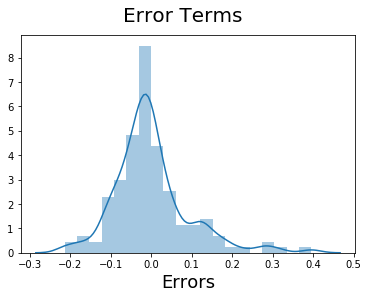

In [118]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((Y_train_RFE - y_train_price9), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 8: Making Predictions Using the Final Model

#### Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. Nineth model.

#### Already test dataset X_test_RFE_upd is scaled and also has all the 17 variables suggested by RFE_support been dropped

In [119]:
X_test_RFE_upd.describe()

,enginesize,boreratio,stroke,enginetype_l,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,Car_audi,Car_bmw,Car_buick,Car_porsche,Car_saab,Car_volvo
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.241351,0.548152,0.561938,0.062937,0.062937,0.027972,0.062937,0.741259,0.006993,0.006993,0.027972,0.034965,0.041958,0.034965,0.020979,0.020979,0.041958
std,0.154619,0.186426,0.148824,0.243703,0.243703,0.165472,0.243703,0.439483,0.083624,0.083624,0.165472,0.184337,0.201198,0.184337,0.143818,0.143818,0.201198
min,0.000000,0.100000,0.057143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.135849,0.375000,0.495238,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.184906,0.550000,0.571429,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.301887,0.714286,0.633333,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [120]:
X_test_RFE_upd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 122 to 8
Data columns (total 17 columns):
enginesize               143 non-null float64
boreratio                143 non-null float64
stroke                   143 non-null float64
enginetype_l             143 non-null uint8
enginetype_ohcv          143 non-null uint8
enginetype_rotor         143 non-null uint8
cylindernumber_five      143 non-null uint8
cylindernumber_four      143 non-null uint8
cylindernumber_three     143 non-null uint8
cylindernumber_twelve    143 non-null uint8
cylindernumber_two       143 non-null uint8
Car_audi                 143 non-null uint8
Car_bmw                  143 non-null uint8
Car_buick                143 non-null uint8
Car_porsche              143 non-null uint8
Car_saab                 143 non-null uint8
Car_volvo                143 non-null uint8
dtypes: float64(3), uint8(14)
memory usage: 6.4 KB


In [121]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 122 to 8
Data columns (total 9 columns):
const                    143 non-null float64
boreratio                143 non-null float64
stroke                   143 non-null float64
enginetype_ohcv          143 non-null uint8
cylindernumber_twelve    143 non-null uint8
Car_audi                 143 non-null uint8
Car_bmw                  143 non-null uint8
Car_buick                143 non-null uint8
Car_porsche              143 non-null uint8
dtypes: float64(3), uint8(6)
memory usage: 5.3 KB


### Now let's drop the variables which we removed while building the models which are 'cylindernumber_two' ,'enginesize', 'cylindernumber_five', 'cylindernumber_four','cylindernumber_three','enginetype_rotor','enginetype_l', 'Car_saab', 'Car_volvo' from X_test_RFE_upd

In [122]:
X_test_RFE_upd = X_test_RFE.drop(['cylindernumber_two' ,'enginesize', 'cylindernumber_five','cylindernumber_four','cylindernumber_three','enginetype_rotor','enginetype_l', 'Car_saab'],axis=1) 

In [123]:
X_test_RFE_upd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 160 to 128
Data columns (total 56 columns):
symboling                62 non-null float64
fueltype                 62 non-null int64
aspiration               62 non-null int64
doornumber               62 non-null int64
enginelocation           62 non-null int64
carheight                62 non-null float64
boreratio                62 non-null float64
stroke                   62 non-null float64
compressionratio         62 non-null float64
horsepower               62 non-null float64
peakrpm                  62 non-null float64
carbody_convertible      62 non-null uint8
carbody_hardtop          62 non-null uint8
carbody_hatchback        62 non-null uint8
carbody_sedan            62 non-null uint8
carbody_wagon            62 non-null uint8
drivewheel_4wd           62 non-null uint8
drivewheel_fwd           62 non-null uint8
drivewheel_rwd           62 non-null uint8
enginetype_dohc          62 non-null uint8
enginetype_dohcv    

#### Dividing into X_test and y_test

In [124]:
# Adding  constant variable to test dataframe
X_test_m9 = sm.add_constant(X_test_RFE)

In [125]:
X_test_m9 = X_test_m9.drop(dropvar, axis=1)
X_test_m9 = X_test_m9.drop(['cylindernumber_two' ,'enginesize', 'cylindernumber_five','cylindernumber_four','cylindernumber_three','enginetype_rotor','enginetype_l', 'Car_saab'],axis=1)

In [126]:
X_test_m9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 160 to 128
Data columns (total 10 columns):
const                    62 non-null float64
boreratio                62 non-null float64
stroke                   62 non-null float64
enginetype_ohcv          62 non-null uint8
cylindernumber_twelve    62 non-null uint8
Car_audi                 62 non-null uint8
Car_bmw                  62 non-null uint8
Car_buick                62 non-null uint8
Car_porsche              62 non-null uint8
Car_volvo                62 non-null uint8
dtypes: float64(3), uint8(7)
memory usage: 2.4 KB


In [127]:
# Making predictions
Y_pred_m9 = mlr_9.predict(X_test_m9)
Y_pred_m9

160    0.071123
186    0.127627
59     0.178096
165    0.091758
140    0.123356
64     0.178096
198    0.327362
75     0.238255
172    0.254689
104    0.333794
200    0.368958
136    0.168224
111    0.013039
41     0.144716
73     0.797281
31     0.056360
156    0.071123
133    0.168224
65     0.239164
83     0.301866
195    0.368958
197    0.368958
126    0.540521
118    0.044471
167    0.254689
101    0.333794
124    0.301866
69     0.620748
11     0.494666
46     0.164061
         ...   
110    0.278542
201    0.368958
115    0.165752
174    0.140790
134   -0.244467
169    0.254689
92     0.100429
173    0.180204
74     0.797281
3      0.336681
157    0.071123
81     0.178386
32     0.004438
99     0.174714
26     0.044471
88     0.131590
184    0.080831
187    0.080831
52     0.047852
168    0.254689
164    0.071123
188    0.127627
7      0.336681
158    0.140790
123    0.178386
28     0.175787
29     0.310575
182    0.080831
40     0.144716
128    0.540521
Length: 62, dtype: float

## Step 9: Model Evaluation

#### Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

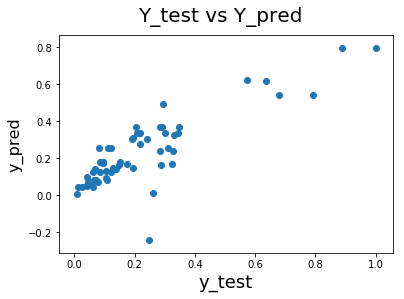

In [128]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(Y_test_RFE, Y_pred_m9)
fig.suptitle('Y_test vs Y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

Text(0, 0.5, 'Index')

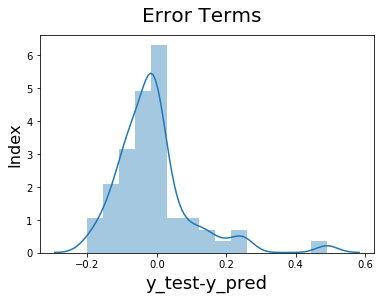

In [129]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((Y_test_RFE-Y_pred_m9),bins=15)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)     

Text(0, 0.5, 'Car Price')

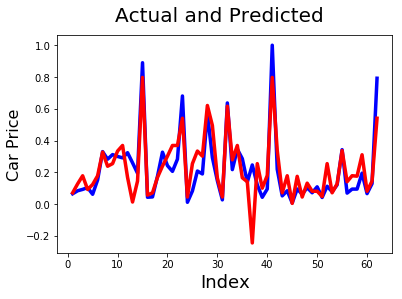

In [130]:
# Actual vs Predicted
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,Y_test_RFE, color="blue", linewidth=3.5, linestyle="-")     #Plotting Actual
plt.plot(c,Y_pred_m9, color="red",  linewidth=3.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)  

Text(0, 0.5, 'ytest-ypred')

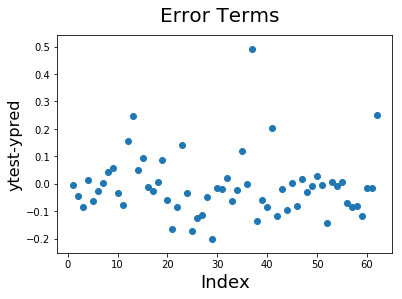

In [131]:
# Error terms
fig = plt.figure()
c = [i for i in range(1,63,1)]
# plt.plot(c,y_test-y_pred_m9, color="blue", linewidth=2.5, linestyle="-")
plt.scatter(c,Y_test_RFE-Y_pred_m9)

fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label